<a href="https://colab.research.google.com/github/pravincoder/Fundamentals_tensorflow/blob/main/Part3_Tensorflow_Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network Classification with TensorFlow
In this notebook we're going to learn how to write neural network for           Classification Problems.


## Classification Problem:-

* `Email`-'Spam' or 'Not Spam' a perfect example of **Binary classification**.

* `ImageClassification` - like 'Cat' , 'Dog' and 'Person' etc is called **Multiclass Classification**.

* `TagsPrediction` - in a wikipedia page "what tags should this page include?" is called **MultiLabel Classification**. 

In [115]:
# Creating data to view and fit
from  sklearn .datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X,y = make_circles(n_samples,noise=0.03,random_state=42)


In [116]:
# Check features amd labels
X[:5], y[:5]


(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

#### **Note-** As the given label only include (1,0) this is a binary classification problem

In [117]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1]})
circles

,X0,X1
0,0.754246,0.231481
1,-0.756159,0.153259
2,-0.815392,0.173282
3,-0.393731,0.692883
4,0.442208,-0.896723
...,...,...
995,0.244054,0.944125
996,-0.978655,-0.272373
997,-0.136900,-0.810012
998,0.670362,-0.767502


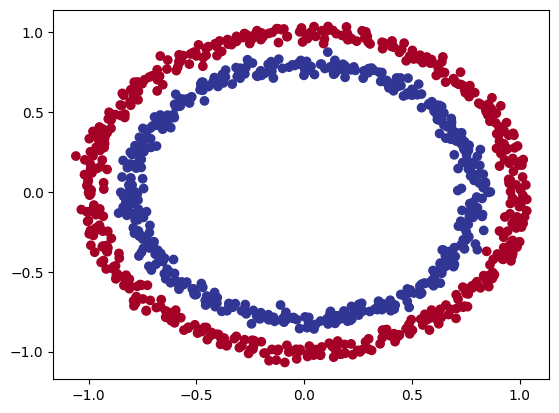

In [118]:
# Visualise the dataframe
import matplotlib.pyplot as plt
plt.scatter(circles['X0'],circles['X1'],c=y,cmap=plt.cm.RdYlBu)

### **Exercise-** we have to create a model that predicts the color of the given point of the cirle as shown above red='1' and blue='0'

## Input  & Output shapes

In [119]:
# Input shape(Features)
X.shape

(1000, 2)

In [120]:
# Output Shape (Labels)
y.shape


(1000,)

## BinaryClassification Model Creation


Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6917 - accuracy: 0.5110
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.5030
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6879 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6750 - accuracy: 0.5330
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6699 - accuracy: 0.5300
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6628 - accuracy: 0.5520
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6550 - accuracy: 0.5300
Epoch 11/

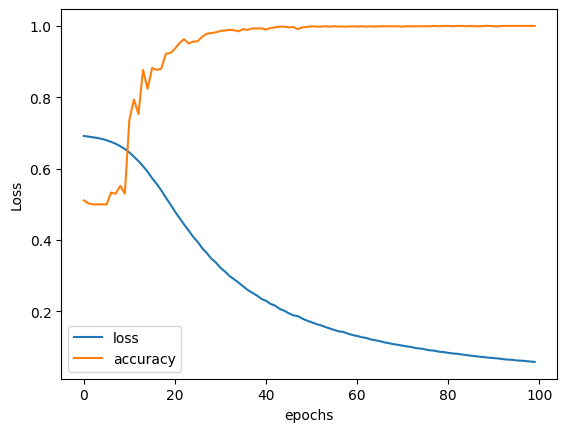

In [121]:

import tensorflow as tf
# Model random seed
tf.random.set_seed(42)

# Model layers
B_Model = tf.keras.Sequential([tf.keras.layers.Input(shape=(2,),name='Input_layer'),
                               tf.keras.layers.Dense(100,activation='relu',name='D1'),
                               tf.keras.layers.Dense(2,activation='relu',name='D2'),
                               tf.keras.layers.Dense(1,activation='sigmoid',name='Output_layer')],name = 'BinaryClassification_Model') 
B_Model.compile(loss='BinaryCrossentropy',optimizer='Adam',metrics='accuracy')

# Fit the Model
history = B_Model.fit(circles,y,epochs=100)
# Visualize loss
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("epochs")
plt.show()


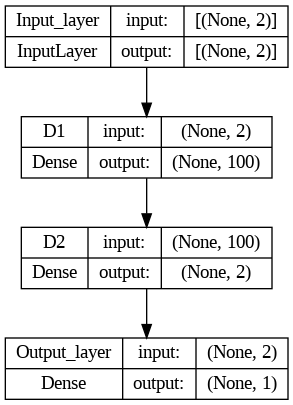

In [122]:
from tensorflow.keras.utils import plot_model
plot_model(B_Model,show_shapes=True)

In [123]:
# Evaluate model
B_Model.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0572 - accuracy: 1.0000


[0.05721801891922951, 1.0]

To visualize  our Model's predictions, let's create a function `plot_desision_boundary()` this function will :-
* Take in a Trained Model ,features (X) and labels (y).
* Create a meshgrid of different X values.
* Make predictions across the Meshgrid
* Plot the predictions as well as a line btw zones(where each unique class falls).


In [124]:
import numpy as np
def plot_decision_boundary(model,X,y):
  """ Plots the decision boundary by the model predicting on X """
  # Define the asis boundaries of the plot and create a meshgrid
  x_min,x_max=X[:,0].min()-0.1,X[:,0].max()+0.1
  y_min,y_max=X[:,1].min()-0.1,X[:,1].max()+0.1
  xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,100))
  # Create X value(we're going to make prediction on these)
  x_in =np.c_[xx.ravel(),yy.ravel()] # stack 2d array in one array

  #make Prediction
  y_pred = model.predict(x_in)

  #check for multi-class problem
  if  len(y_pred[0])>1:
    print("Doing Multiclass Classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    print("Doing binary Classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
  #Plot the decision boundary
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu ,alpha =0.7)
  plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())




313/313 [==============================] - 0s 1ms/step
Doing binary Classification


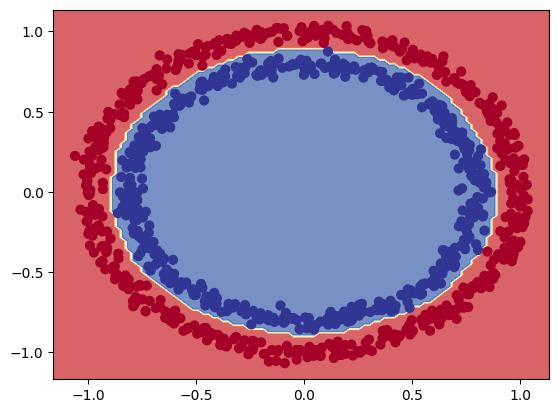

In [125]:
plot_decision_boundary(B_Model,X,y)

# Non-Linearity
**Reference before modeling-** [Tensorflow Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.40569&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)


Next Model playground Accuracy:-[All parameters are set](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.40569&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

In [126]:
X,y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [127]:
# lets create a model  after check it in playground same as the set parameters
# Random Seed
tf.random.set_seed(42)
# layering
model_1= tf.keras.Sequential([tf.keras.layers.Input(shape=(2,)),
                              tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
                              tf.keras.layers.Dense(2,activation=tf.keras.activations.relu),
                              tf.keras.layers.Dense(1,activation='sigmoid')                           
])
#compiling
model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

#fitting
history = model_1.fit(X,y,epochs=50)

Epoch 1/50
32/32 [==============================] - 1s 3ms/step - loss: 0.6906 - accuracy: 0.5130
Epoch 2/50
32/32 [==============================] - 0s 4ms/step - loss: 0.6849 - accuracy: 0.5330
Epoch 3/50
32/32 [==============================] - 0s 3ms/step - loss: 0.6813 - accuracy: 0.5470
Epoch 4/50
32/32 [==============================] - 0s 4ms/step - loss: 0.6647 - accuracy: 0.5640
Epoch 5/50
32/32 [==============================] - 0s 4ms/step - loss: 0.6381 - accuracy: 0.6240
Epoch 6/50
32/32 [==============================] - 0s 4ms/step - loss: 0.6051 - accuracy: 0.6500
Epoch 7/50
32/32 [==============================] - 0s 3ms/step - loss: 0.5802 - accuracy: 0.6730
Epoch 8/50
32/32 [==============================] - 0s 4ms/step - loss: 0.5720 - accuracy: 0.6750
Epoch 9/50
32/32 [==============================] - 0s 4ms/step - loss: 0.5564 - accuracy: 0.6890
Epoch 10/50
32/32 [==============================] - 0s 4ms/step - loss: 0.5513 - accuracy: 0.6970
Epoch 11/50
32/32 [

<Axes: >

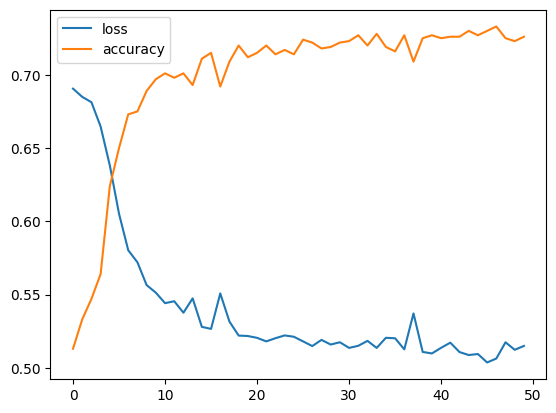

In [128]:
pd.DataFrame(history.history).plot()

313/313 [==============================] - 1s 2ms/step
Doing binary Classification


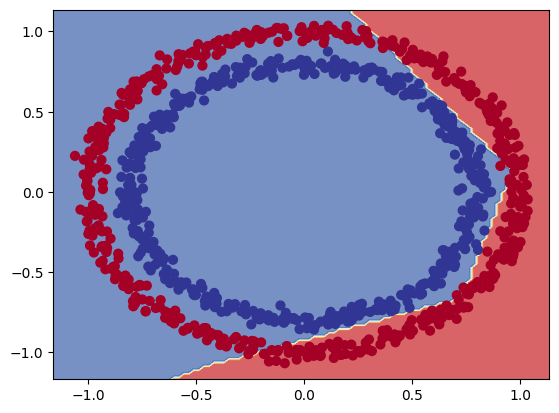

In [129]:
#Visualize the accuracy on data
plot_decision_boundary(model_1,X,y)

In [130]:
# Create a toy a Tensor (similar to the data into our models).
import tensorflow as tf
import matplotlib.pyplot as plt 
A = tf.cast(tf.range(-20,20,2),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-20., -18., -16., -14., -12., -10.,  -8.,  -6.,  -4.,  -2.,   0.,
         2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.],
      dtype=float32)>

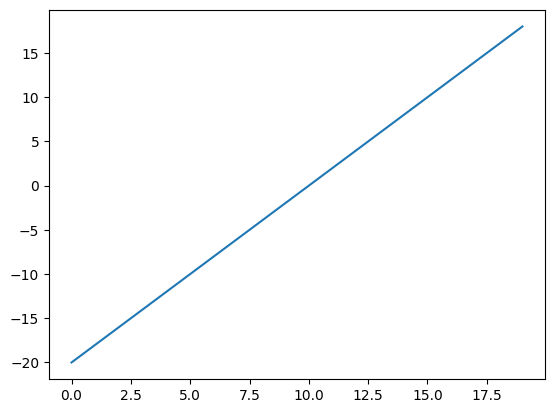

In [131]:
#Visualize our toy tensor
plt.plot(A)

In [132]:
# Sigmoid Function
def sigmoid(x):
  return 1/(1+tf.exp(-x))
# use the Sigmoid function
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([2.0611537e-09, 1.5229981e-08, 1.1253517e-07, 8.3152804e-07,
       6.1441751e-06, 4.5397872e-05, 3.3535014e-04, 2.4726233e-03,
       1.7986210e-02, 1.1920292e-01, 5.0000000e-01, 8.8079703e-01,
       9.8201376e-01, 9.9752742e-01, 9.9966466e-01, 9.9995458e-01,
       9.9999380e-01, 9.9999917e-01, 9.9999988e-01, 1.0000000e+00],
      dtype=float32)>

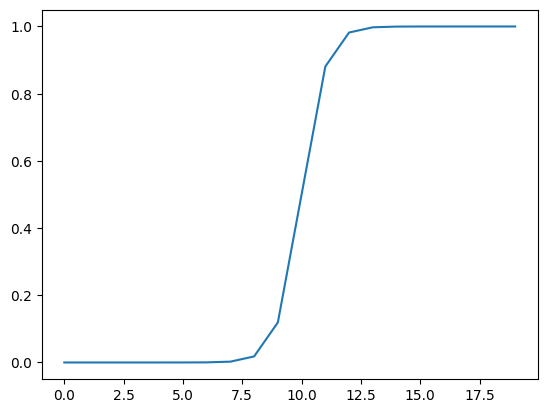

In [133]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A));

In [134]:
# LEts create a relu function
def relu(x):
  return tf.maximum(0,x)

# pass toy tensor to custom relu function
relu(A)


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  4.,
        6.,  8., 10., 12., 14., 16., 18.], dtype=float32)>

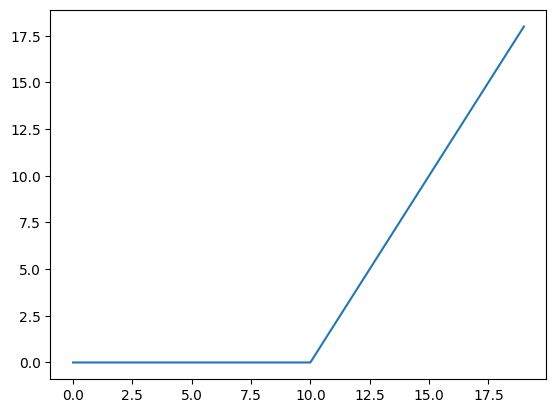

In [135]:
plt.plot(relu(A))

## Evaluating and improving our classification model

Till now we're training and testing on the same dataset ... 
However in ML this is a sin/blunder.
So lets create a test and train sets.


In [136]:
# Check len of sample in circle data
len(X)

1000

In [137]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [138]:
# Split into train(80%) and test(20%)
X_train,y_train=X[:800],y[:800]
X_test,y_test=X[800:],y[800:]
#Check Shape
(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

((800, 2), (800,), (200, 2), (200,))

In [139]:
# Recreate a model on train data and evaluate on test data
# Set seed 
tf.random.set_seed(42)

# MOdel 
model_2 = tf.keras.Sequential([tf.keras.layers.Input(shape=(2,)),
                               tf.keras.layers.Dense(20,activation='relu'),
                               tf.keras.layers.Dense(10,activation='relu'),
                               tf.keras.layers.Dense(1,activation='sigmoid')
                               ],name='Model2')

#Compile
model_2.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(lr=0.01),metrics=['accuracy'])

#fit
histroy=model_2.fit(X_train,y_train,epochs=50)


Epoch 1/50
25/25 [==============================] - 1s 2ms/step - loss: 0.6914 - accuracy: 0.4988
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6852 - accuracy: 0.4988
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.5013
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6809 - accuracy: 0.5512
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6793 - accuracy: 0.5625
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6775 - accuracy: 0.5725
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6748 - accuracy: 0.5850
Epoch 8/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6723 - accuracy: 0.5875
Epoch 9/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6693 - accuracy: 0.6137
Epoch 10/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6648 - accuracy: 0.6300
Epoch 11/50
25/25 [

In [140]:
B_Model.summary()

Model: "BinaryClassification_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 D1 (Dense)                  (None, 100)               300       
                                                                 
 D2 (Dense)                  (None, 2)                 202       
                                                                 
 Output_layer (Dense)        (None, 1)                 3         
                                                                 
Total params: 505
Trainable params: 505
Non-trainable params: 0
_________________________________________________________________


In [141]:
#Evaluate MOdel
model_2.evaluate(X_test,y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.1527 - accuracy: 1.0000


[0.1527222990989685, 1.0]

313/313 [==============================] - 1s 2ms/step
Doing binary Classification
313/313 [==============================] - 0s 1ms/step
Doing binary Classification


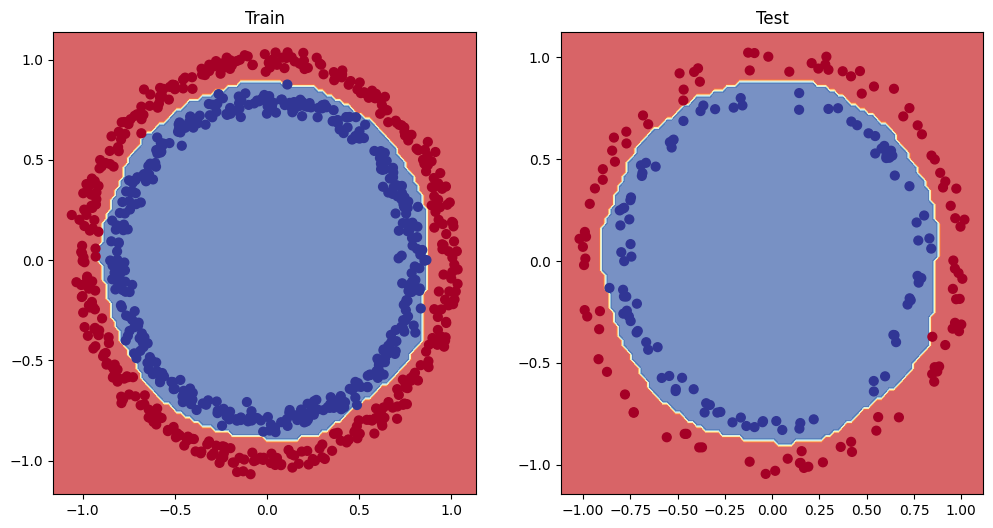

In [142]:
#Plot the decision boundary for trqin and test set
plt.figure(figsize=(12,6))
plt.subplot(1,2,1) # (rows,colm,1st val)
plt.title('Train')
plot_decision_boundary(model_2,X_train,y_train)
plt.subplot(1,2,2) # (rows,colm,2nd val)
plt.title('Test')
plot_decision_boundary(model_2,X_test,y_test)
plt.show()

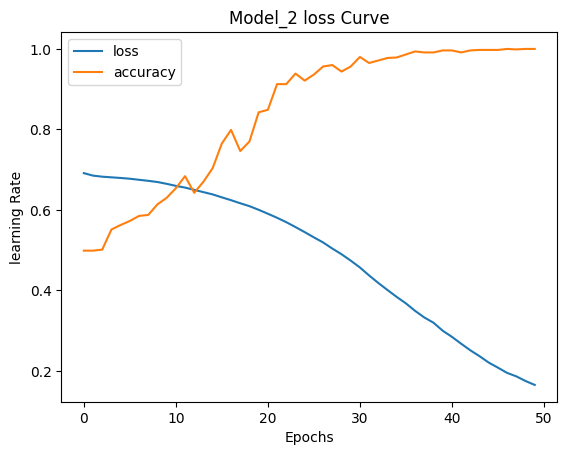

In [143]:
# Check Histroy of model
pd.DataFrame(histroy.history).plot() # 
plt.title('Model_2 loss Curve');
plt.xlabel('Epochs');
plt.ylabel('learning Rate');

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during Training ) we're going to use the following steps:
* A learning Rate **CallBack**(add extra functionality to your model *while Training*)
* Another model (we could use the same one as above or get variation's)
* A modified Loss curve

In [144]:

# Set seed 
tf.random.set_seed(42)

# MOdel 
model_3 = tf.keras.Sequential([tf.keras.layers.Input(shape=(2,)),
                               tf.keras.layers.Dense(4,activation='relu'),
                               tf.keras.layers.Dense(4,activation='relu'),
                               tf.keras.layers.Dense(1,activation='sigmoid')
                               ],name='Model2')

#Compile
model_3.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

#Create a learning rate Callback
lr_scheduler= tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**(epoch/20))

#fit
histroy=model_3.fit(X_train,y_train,epochs=100,callbacks=[lr_scheduler])



Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6984 - accuracy: 0.5138 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6983 - accuracy: 0.5150 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6982 - accuracy: 0.5150 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6981 - accuracy: 0.5150 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.5150 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6978 - accuracy: 0.5138 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6977 - accuracy: 0.5150 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6976 - accuracy: 0.5150 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='Epochs', ylabel='Lr Count'>

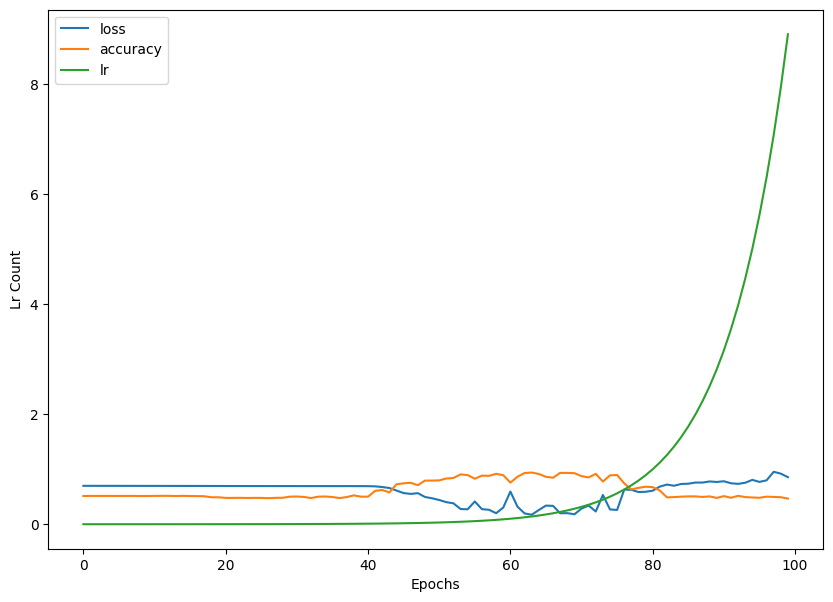

In [145]:
pd.DataFrame(histroy.history).plot(figsize=(10,7),xlabel="Epochs",ylabel='Lr Count')

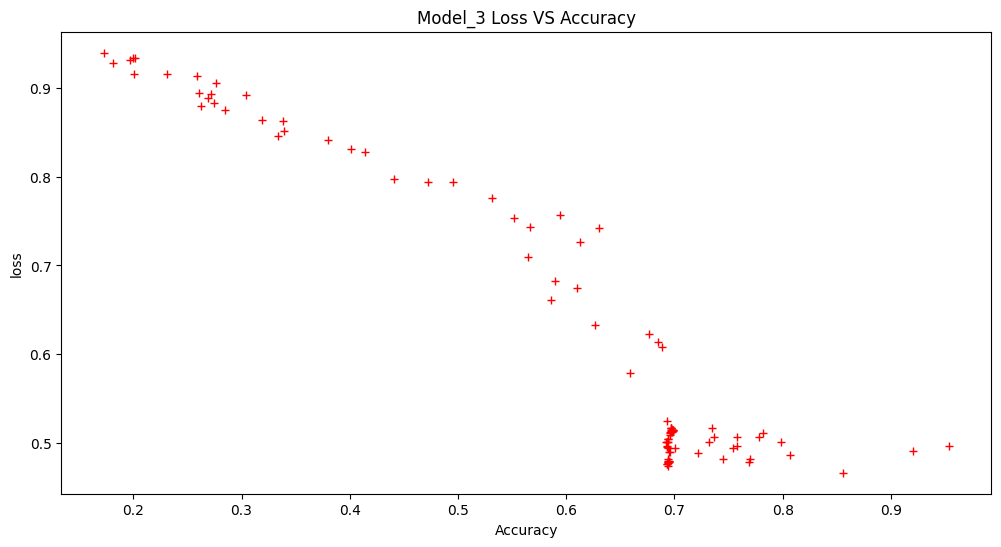

In [146]:
# Just plot a graph of Acc vs loss
model_3loss=histroy.history['loss']
model_3acc=histroy.history['accuracy']
plt.figure(figsize=(12,6))
plt.title('Model_3 Loss VS Accuracy');
plt.plot(model_3loss,model_3acc,'r+');
plt.xlabel("Accuracy");
plt.ylabel('loss');

In [147]:
len(model_3loss),len(model_3acc)

(100, 100)

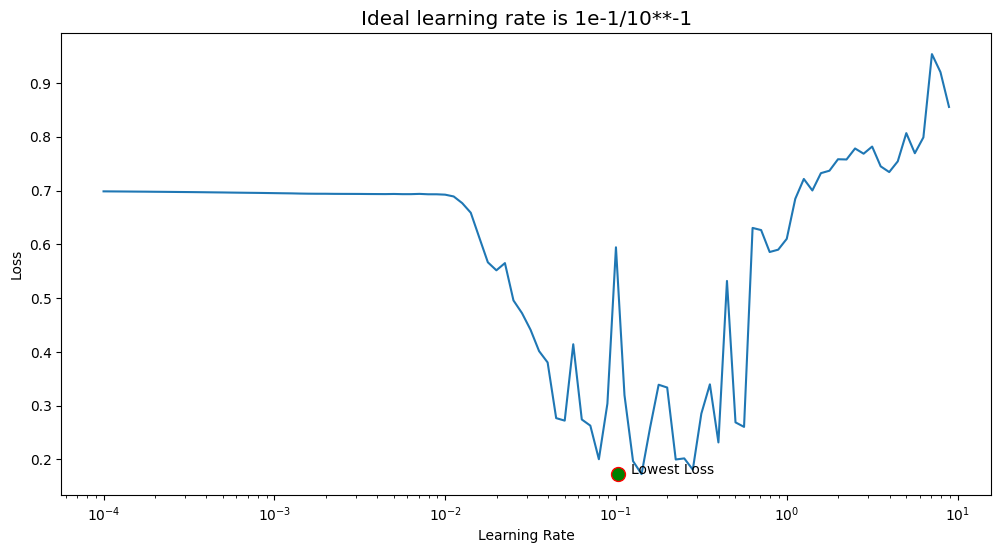

In [148]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(12,6))
plt.semilogx(lrs,histroy.history['loss'])
plt.title('Learning Rate VS Loss');
plt.xlabel('Learning Rate');
plt.ylabel('Loss');

#x_bottom = histroy.history['lr'].index(y_bottom)
bottom = min(histroy.history['loss'])
bottom
plt.plot(0.103,bottom,marker="o", markersize=10, markeredgecolor="red", markerfacecolor="green",)
plt.text(0.122,bottom,"Lowest Loss")
plt.title("Ideal learning rate is 1e-1/10**-1",fontsize='x-large')
plt.show();

In [149]:
# Ideal learning rate is 1e-1

In [150]:
# Example of other typical learning rate values
10**0,10**-1,10**-2,1e-3,1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [151]:
# Lets create a model on ideal learning rate
# Set seed 
tf.random.set_seed(42)

# MOdel 
model_4 = tf.keras.Sequential([tf.keras.layers.Input(shape=(2,)),
                               tf.keras.layers.Dense(20,activation='relu'),
                               tf.keras.layers.Dense(10,activation='relu'),
                               tf.keras.layers.Dense(1,activation='sigmoid')
                               ],name='Model2')

#Compile
model_4.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(lr=0.02),metrics=['accuracy'])

#fit
histroy=model_4.fit(X_train,y_train,epochs=30)

Epoch 1/30
25/25 [==============================] - 1s 3ms/step - loss: 0.6884 - accuracy: 0.5013
Epoch 2/30
25/25 [==============================] - 0s 3ms/step - loss: 0.6869 - accuracy: 0.4988
Epoch 3/30
25/25 [==============================] - 0s 3ms/step - loss: 0.6856 - accuracy: 0.5050
Epoch 4/30
25/25 [==============================] - 0s 3ms/step - loss: 0.6844 - accuracy: 0.5138
Epoch 5/30
25/25 [==============================] - 0s 3ms/step - loss: 0.6831 - accuracy: 0.5300
Epoch 6/30
25/25 [==============================] - 0s 3ms/step - loss: 0.6815 - accuracy: 0.5337
Epoch 7/30
25/25 [==============================] - 0s 3ms/step - loss: 0.6792 - accuracy: 0.5913
Epoch 8/30
25/25 [==============================] - 0s 3ms/step - loss: 0.6776 - accuracy: 0.5838
Epoch 9/30
25/25 [==============================] - 0s 3ms/step - loss: 0.6754 - accuracy: 0.6037
Epoch 10/30
25/25 [==============================] - 0s 3ms/step - loss: 0.6729 - accuracy: 0.6263
Epoch 11/30
25/25 [

In [152]:
model_4.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.4781 - accuracy: 0.9950


[0.47807732224464417, 0.9950000047683716]

<Axes: >

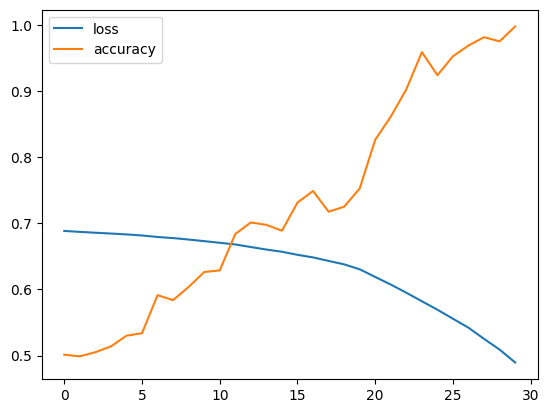

In [153]:
pd.DataFrame(histroy.history).plot()

313/313 [==============================] - 1s 2ms/step
Doing binary Classification
313/313 [==============================] - 1s 2ms/step
Doing binary Classification


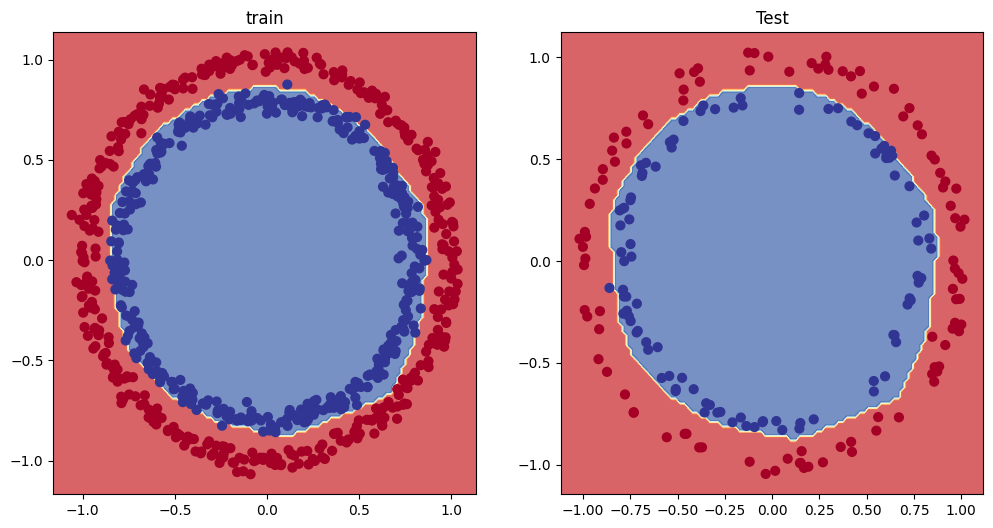

In [154]:
# Plot decision boundary boundary for the train and test set
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('train')
plot_decision_boundary(model_4,X=X_train,y= y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4,X=X_test,y=y_test)


## To find the ideal learning rate (the learning rate where the loss decreases the most during Training ) 

### we're going to use the following steps:

* A learning Rate CallBack(add extra functionality to your model while Training)
* Another model (we could use the same one as above or get variation's)
* A modified Loss curve

In [155]:

# Set seed 
tf.random.set_seed(42)

# MOdel 
model_3 = tf.keras.Sequential([tf.keras.layers.Input(shape=(2,)),
                               tf.keras.layers.Dense(20,activation='relu'),
                               tf.keras.layers.Dense(10,activation='relu'),
                               tf.keras.layers.Dense(1,activation='sigmoid')
                               ],name='Model2')

#Compile
model_3.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

#Create a learning rate Callback
lr_scheduler= tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**(epoch/20))

#fit
histroy=model_3.fit(X_train,y_train,epochs=50,callbacks=[lr_scheduler])

Epoch 1/50
25/25 [==============================] - 1s 3ms/step - loss: 0.7001 - accuracy: 0.4925 - lr: 1.0000e-04
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6993 - accuracy: 0.4938 - lr: 1.1220e-04
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6986 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6978 - accuracy: 0.4963 - lr: 1.4125e-04
Epoch 5/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6971 - accuracy: 0.4975 - lr: 1.5849e-04
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6963 - accuracy: 0.4938 - lr: 1.7783e-04
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6954 - accuracy: 0.4888 - lr: 1.9953e-04
Epoch 8/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6947 - accuracy: 0.4775 - lr: 2.2387e-04
Epoch 9/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6939 -

<Axes: xlabel='Epochs', ylabel='Lr Count'>

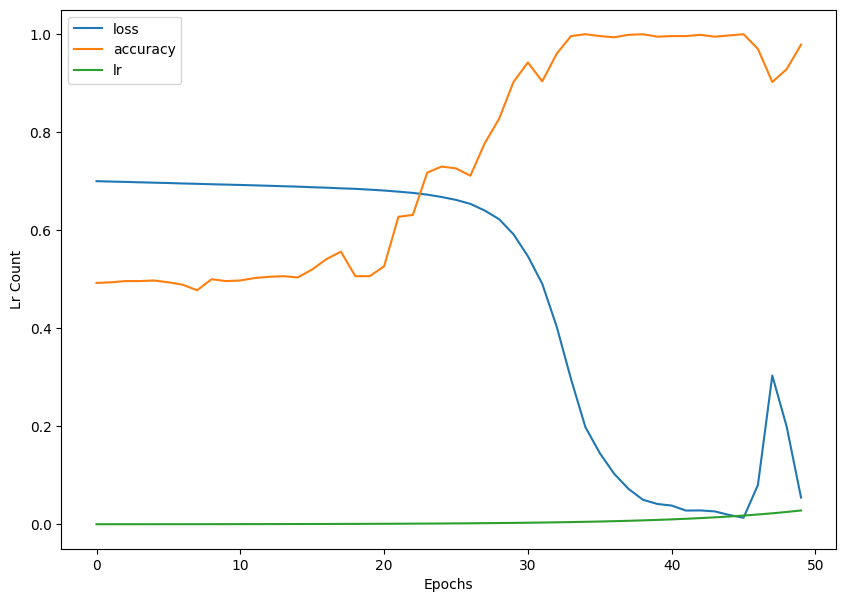

In [156]:
pd.DataFrame(histroy.history).plot(figsize=(10,7),xlabel="Epochs",ylabel='Lr Count')

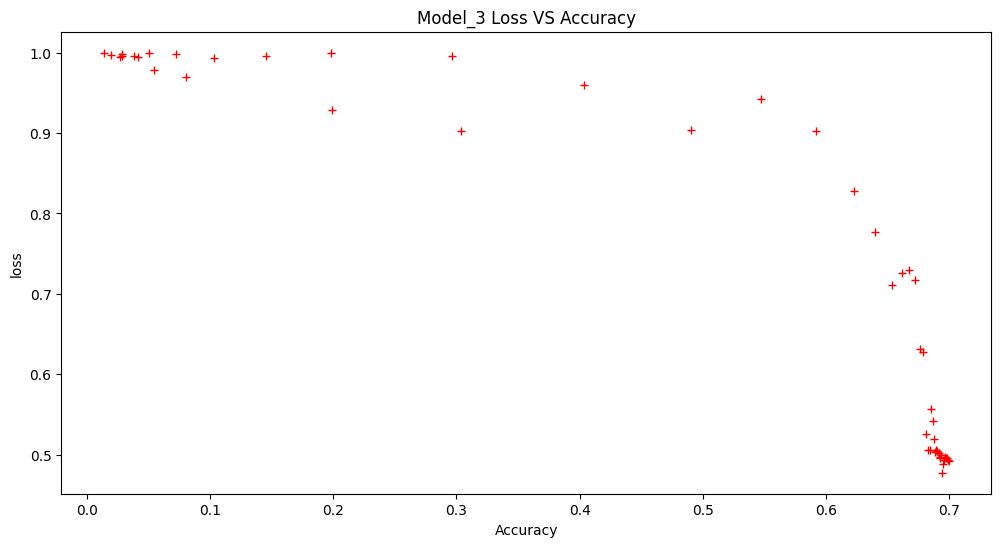

In [157]:
# Just plot a graph of Acc vs loss
model_3loss=histroy.history['loss']
model_3acc=histroy.history['accuracy']
plt.figure(figsize=(12,6))
plt.title('Model_3 Loss VS Accuracy');
plt.plot(model_3loss,model_3acc,'r+');
plt.xlabel("Accuracy");
plt.ylabel('loss');
     

In [158]:

len(model_3loss),len(model_3acc)

(50, 50)

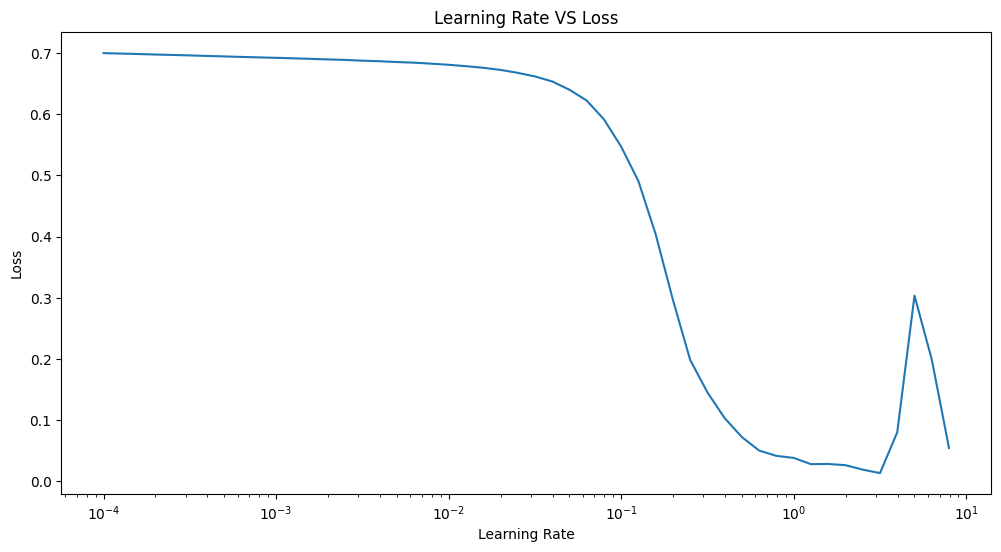

In [159]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(50)/10))
plt.figure(figsize=(12,6))
plt.semilogx(lrs,histroy.history['loss'])
plt.title('Learning Rate VS Loss');
plt.xlabel('Learning Rate');
plt.ylabel('Loss');

#x_bottom = histroy.history['lr'].index(y_bottom)
bottom = min(histroy.history['loss'])
bottom
#plt.plot(0.053,bottom,marker="o", markersize=10, markeredgecolor="red", markerfacecolor="green",)
#plt.text(0.033,bottom,"Lowest Loss")
plt.show();

 trTrstTTTTTTTTTTTT    eeewewew                            model_4.evaluate(X_test,y_test)    dasdsdasdsadsadasedwaewewaed dsadasassddsadsdsadaddttf## Creating a Confusion Matrix



In [160]:
# Check acuuracy 
loss , accuracy = model_3.evaluate(X_test,y_test)
print(f"MOdel loss on the test set: {loss}")
print(f"Model accuracy on the test set: {accuracy*100:.2f}%")

7/7 [==============================] - 0s 4ms/step - loss: 0.0122 - accuracy: 1.0000
MOdel loss on the test set: 0.012150801718235016
Model accuracy on the test set: 100.00%


In [161]:
# Import Confusion Matrix
from sklearn.metrics import confusion_matrix
# Make Predictions
y_pred = model_3.predict(X_test)
#Create confusion matrix
confusion_matrix (y_test,y_pred)

7/7 [==============================] - 0s 3ms/step


ValueError: ignored

In [162]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [163]:
y_pred[:10]

array([[9.8599368e-01],
       [9.9916673e-01],
       [9.9284577e-01],
       [9.9790025e-01],
       [4.9706444e-02],
       [9.3944790e-04],
       [9.5849943e-01],
       [2.6643925e-04],
       [9.9532747e-01],
       [1.1064060e-03]], dtype=float32)

Looks like our prediction array has come in **Prediction Probability** form 

This is  standard output of activation function.

In [164]:
#Convert prediction to binary format and view the first 10
tf.round(y_pred)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [165]:
# Create Confusion matrix
confusion_matrix(y_test,tf.round(y_pred))

array([[101,   0],
       [  0,  99]])

### Pretify our Confusion matrix


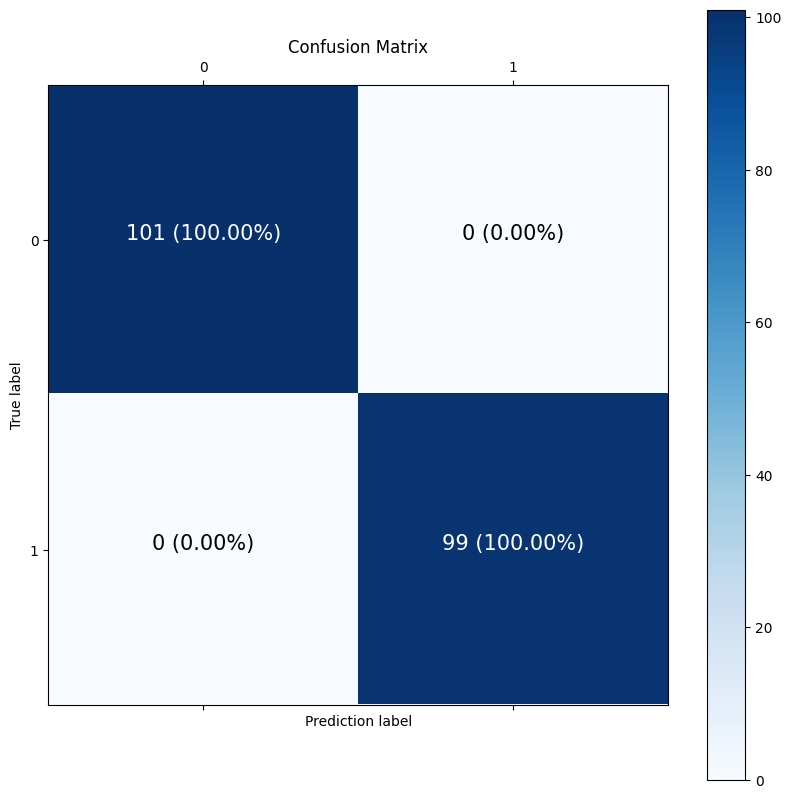

In [183]:
import itertools
figsize =(10,10)
# Create the confusion matrix
cm = confusion_matrix(y_test,tf.round(y_pred))
cm_norm = cm.astype("float")/cm.sum(axis=1)[:,np.newaxis] #normailize 
n_classes =cm.shape[0]
#lets prettify it
fig,ax = plt.subplots(figsize=figsize)
#create a matrix plot
cax = ax.matshow(cm,cmap=plt.cm.Blues) # first cm = confusion matrix , plt.cm refers colorMap
fig .colorbar(cax)

#Check Classes
classes = False
if classes:
  label = classes
else:
  label = np.arange(cm.shape[0]) 

#label the axis
ax.set(title = "Confusion Matrix",
       xlabel = "Prediction label",
       ylabel = "True label",
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels = label,
       yticklabels = label)

#set Threshold for different color
threshold = (cm.max()+cm.min())/2

#plot the text on each cell
for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
  plt.text(j, i,s= f"{cm[i,j]} ({cm_norm[i,j]*100:.2f}%)",
           horizontalalignment="center",
           color='white' if cm[i,j] > threshold else"black",
           size=15)

In [167]:
cm.shape

(2, 2)

In [168]:
cm_norm

array([[1., 0.],
       [0., 1.]])